# CS 425 fall 2021 Assignment 1


## Gene finding 

In class we defined an Open Reading Frame (ORF) as a substring of DNA that starts with a start codon, ends with a stop codon, with no stop codon in the middle, and whose length is a multiple of 3. Write a program to look for long open reading frames in DNA sequences. Note that ORFs can overlap!

Using your program, analyze the DNA sequences of the following organisms: 

* The [ebola virus](https://www.ncbi.nlm.nih.gov/nuccore/KM034562).
* The bacterium [Haemophilus influenzae](https://www.ncbi.nlm.nih.gov/genome/?term=txid727[Organism:exp]).  H. influenzae was the first genome of a living organism (as opposed to a virus) to be sequenced.  Here's a link to the [publication](https://pubmed.ncbi.nlm.nih.gov/7542800/) describing the sequencing effort.
* The bacterium [E. coli](https://www.ncbi.nlm.nih.gov/nuccore/NC_000913).


For each of these, download the genome in fasta format, and report on the number of long ORFs (longer than 100 codons) that you found with your program.  Compare your findings to the number of genes that organism has.
For the ebola virus, you can verify the positions of the ORFs individually by comparing them to what you see in the in the [Ebola virus genome browser at UCSC](http://genome.ucsc.edu/cgi-bin/hgTracks?db=eboVir3).
What can you say about the accuracy of this method based on your experiments?

In [1]:
from os import remove

In [8]:
#FINDS ORFS IN A STRING
def find_orfs(genome , reverse) :
  orfs = []
  if reverse == True:
      sign = '-'
  else:
      sign = '+'
    
  for i in range(0,len(genome),3):
      startcodone = genome[i:i+3]
      if startcodone == 'ATG':
        for x in range(i,len(genome),3):
          endcodone = genome[x:x+3]
          if endcodone == 'TAA':   
            orfs.append((i,x,sign))
            break
          if endcodone == 'TAG':    
            orfs.append((i,x,sign))
            break
          if endcodone == 'TGA':  
            orfs.append((i,x,sign))
            break         
                        
  return orfs

#COMBINE AND REDUCE
def merge(g1, g2, g3, g4, g5, g6):
    combined = g1 + g2 + g3 + g4 + g5 + g6
    delete = []

    for element in combined:
        if element[1] - element[0] < 100:
            delete.append(element)
    for x in delete:
        combined.remove(x)

    combined.sort()
    return combined

#COMPLEMENT REVERSE GENOME
def complement(genome):
  bases = {'A':'T','T':'A','C':'G','G':'C'}
  rev = []

  for gene in genome:
    rev += bases[gene]
  return ''.join(rev)[::-1]

#READ FILE
def read_fasta(file_name):
  with open(file_name,"r") as f:
    #read first line of description
    description = f.readline().rstrip()

    #read genome sequence
    genome = ""
    line = f.readline().rstrip()
    while line != '':
      genome += line
      line = f.readline().rstrip()
  return description, genome

if __name__ == "__main__":
  #THE START FOR SEQUENCES. IF FASTA FILE PATHS DO NOT WORK EDIT PATHS BELOW. I PUT THE FILE NAMES JUST HOW THEY WERE DOWNLOADED JUST LIKE YOU ASKED.
  #EXRTACT DATA FROM FILES
  ebola_description, ebola_genome = read_fasta("sequence.fasta")
  eColi_description, eColi_genome = read_fasta("sequence (1).fasta")
  influenzae_description, influenzae_genome = read_fasta("GCF_004802225.1_ASM480222v1_genomic.fna")


  #CHANGE ENTIRE GENOME INTO 6 OPEN READING FRAMES
  ebola_rev = complement(ebola_genome)
  ebola_pos1 = find_orfs(ebola_genome,False)
  ebola_pos2 = find_orfs(ebola_genome[1:],False)
  ebola_pos3 = find_orfs(ebola_genome[2:],False)
  ebola_pos4 = find_orfs(ebola_rev,True)
  ebola_pos5 = find_orfs(ebola_rev[1:],True)
  ebola_pos6 = find_orfs(ebola_rev[2:],True)

  ebola_orfs = merge(ebola_pos1,ebola_pos2,ebola_pos3,ebola_pos4,ebola_pos5,ebola_pos6)
  print(ebola_description)
  print(ebola_orfs)

  ecoli_rev = complement(eColi_genome)
  ecoli_pos1 = find_orfs(eColi_genome,False)
  ecoli_pos2 = find_orfs(eColi_genome[1:],False)
  ecoli_pos3 = find_orfs(eColi_genome[2:],False)
  ecoli_pos4 = find_orfs(ecoli_rev,True)
  ecoli_pos5 = find_orfs(ecoli_rev[1:],True)
  ecoli_pos6 = find_orfs(ecoli_rev[2:],True)

  ecoli_orfs = merge(ecoli_pos1,ecoli_pos2,ecoli_pos3,ecoli_pos4,ecoli_pos5,ecoli_pos6)
  print()
  print(eColi_description)
  print(ecoli_orfs)

  reverse_flu = complement(influenzae_genome)
  flu_pos1 = find_orfs(influenzae_genome,False)
  flu_pos2 = find_orfs(influenzae_genome[1:],False)
  flu_pos3 = find_orfs(influenzae_genome[2:],False)
  flu_pos4 = find_orfs(reverse_flu,True)
  flu_pos5 = find_orfs(reverse_flu[1:],True)
  flu_pos6 = find_orfs(reverse_flu[2:],True)

  flu_orfs = merge(flu_pos1, flu_pos2, flu_pos3, flu_pos4, flu_pos5, flu_pos6)
  print()
  print(influenzae_description)
  print(flu_orfs)


>KM034562.1 Zaire ebolavirus isolate Ebola virus/H.sapiens-wt/SLE/2014/Makona-G3686.1, complete genome
[(246, 525, '-'), (327, 525, '-'), (468, 2685, '+'), (495, 2685, '+'), (522, 2685, '+'), (657, 768, '-'), (693, 2685, '+'), (876, 2685, '+'), (1056, 2685, '+'), (1059, 2685, '+'), (1077, 2685, '+'), (1122, 2685, '+'), (1128, 2685, '+'), (1185, 1293, '-'), (1188, 1293, '-'), (1470, 1596, '+'), (1596, 2685, '+'), (1599, 1839, '-'), (1647, 2685, '+'), (1665, 1839, '-'), (1731, 1839, '+'), (1734, 1839, '+'), (1737, 1839, '+'), (1896, 2685, '+'), (2130, 2358, '-'), (2148, 2685, '+'), (2223, 2358, '-'), (2229, 2433, '+'), (2232, 2433, '+'), (2418, 2685, '+'), (2475, 2685, '+'), (2478, 2685, '+'), (2583, 2685, '+'), (3126, 4146, '+'), (3183, 4146, '+'), (3225, 4146, '+'), (3300, 4146, '+'), (3327, 4146, '+'), (3336, 3468, '-'), (3495, 4146, '+'), (3537, 4146, '+'), (3564, 4146, '+'), (3624, 3735, '+'), (3648, 3753, '-'), (3717, 3936, '-'), (3795, 3936, '-'), (3807, 4146, '+'), (3993, 4182, '

In [ ]:
# analysis of ebola, H. influenzae and E. coli genomes

**Data Collection**
>For today's analysis I will be using three similar, but diffrent types of data. The three data collections will be the DNA of Ebola, E.Coli, and Haempopphilus Influenzae. The sizes of all three organism's vary greatly. Ebola DNA has a size of 18,957 characters consisting of ATGC. Now compare that with E.Coli which has a size of 4,641,652 characters, here you can see that the size of data has a large margin. Lastly, the influenzae has a size of 1,002,113 characters. Although, the number of characters is much larger than Ebola it is still no where near the same number of characters as E.Coli. The DNA of all three organisms is coming from the National Center for Niotechnology Information or better known as NCBI. I downloaded two of the organisms as a FASTA file and the influenzae as a FNA file. With the three files I will analyze the entire DNA to find all the Open Reading Frames (ORF's) that are greater than 100 characters long. All ORF's must have a start codone and an end codone.

**Data Quality Check and Cleaning**
>Both FASTA and FNA files come in with the first line of the file being the description followed by the entire DNA of the organism. The DNA came in perfectly for both FASTA files but the FNA file was more tedious. This is because the first line was the description, then followed by the DNA. For some reason this file divided the DNA into "Shotgun Sequences" which meant that while my code read each line, I needed to be prepared to come across random lines where the string will read in another description. Luckily Dr. Asa Ben-Hur said to only focus on the first section of DNA given to me. Therefore, all I needed to do was go into the file and delete what was not needed. Which was very helpful so that I could have a basic reading function in my code that knows to read the first line and save it as a description then read the rest of the lines and save all the DNA into one long string.

**Data Processing**
>Out of all the things I had to do to try and find all the ORF's greater than 100, processing the data was the easiest part. Like I mentioned in the previous segment, all I had to do was create a simple but efficent python function that would open the file and read the first line and save the description of the DNA into a variable. Next I wrote a while loop that will first grab the next line and check to see if it's a blank line or if it's a line with DNA information. If it reads a blank line that is where the while loop will end and the function will return two variables. The first variable is the description of the DNA and the second variable will be one string that holds the entire DNA of the organism. The next thing I did right away was create another variable that would hold the reverse complement of the DNA string. The function called complement does exactly this. The first time I worte this function I created a variable that would hold the reverse complement of the DNA while it reads the orginal string that was passed on to it.(FIGURE 1)

```
#FIGURE 1
def complement(genome):
    str = ""
    for x in genome:
        if x == 'T':
            str = 'A' + str
        if x == 'A':
            str = 'T' + str
        if x == 'G':
            str = 'C' + str
        if x == 'C':
            str = 'G' + str
    return str
```
>I quickly realized how awful this was because when I tried running this with the DNA of E.Coli it took over 30 minutes to complete. I had to do some research to find a better way to run this part of my algorithm. I found that if I used a dictionary I would be able to just focus on the one string and change the "letters" as I go instead of reading two diffrent variables that had to go through a bunch of diffrent if statements (FIGURE 2). Now instead of my algorithm taking over 30 minutes it now runs in under 4 minutes.

```
#FIGURE 2
def complement(genome):
  bases = {'A':'T','T':'A','C':'G','G':'C'}
  rev = []
  for gene in genome:
    rev += bases[gene]
  return ''.join(rev)[::-1]
```
>The next step was to create six diffrent variables for each organism, because there are six diffrent reading frames. At first I used two functions that would use regax to find all the start codones and ends codones which worked perfectly. I then realized that it never collected all six ORF's because it only got two of them. Because regax was not reading the entire string three characters at a time but instead it just went out and found all start codones and end codones (FIGURE 3).

```
# FIDURE 3
def end_codone(genome):
  reg_end = re.compile('(TAA|TAG|TGA)')
  stops = reg_end.finditer(genome)
  for x in stops:
    if x.end() % 3 == 0:
      return x.end()
  return -1

def start_codone(genome):
  reg_start = re.compile('ATG')
  starts = []
  for x in reg_start.finditer(genome):
    starts.append(x.start())
  return starts
```
> Changing those two functions also completely affected my other function at the time called find_orfs. (FIGURE 4)

```
# FIGURE 4
def find_orfs(genome):
start_index = start_codone(genome)
    stop_index = []
    orfs = []
    for x in start_index:
      rel_stop = end_codone(genome[x:])
      if rel_stop != -1:
        stop = x + rel_stop
        if stop not in stop_index:
          orfs.append((rel_stop,x,stop))
          stop_index.append(stop)
    for i, orf in enumerate(orfs):
        if reverse == True:
                orfs[i] = (orf[1], orf[2], '-')
        else:
                orfs[i] = (orf[1], orf[2], '+')
    return orfs
```
> I spent an entire day re-working my algorithm to make sure that I was indeed reading all six diffrent ORF's. I did all of this in one function called find_orfs() that took the string of DNA and read it entirely making sure that it did read 3 characters at a time and then when it found a start codone and end codone, that it would add it to a list including if the ORF was positive or negative. (FIGURE 5)


```
# FIGURE 5
def find_orfs(genome , reverse) :
  orfs = []
  if reverse == True:
      sign = '-'
  else:
      sign = '+'
  for i in range(0,len(genome),3):
      startcodone = genome[i:i+3]
      if startcodone == 'ATG':
        for x in range(i,len(genome),3):
          endcodone = genome[x:x+3]
          if endcodone == 'TAA':   
            orfs.append((i,x,sign))
            break
          if endcodone == 'TAG':    
            orfs.append((i,x,sign))
            break
          if endcodone == 'TGA':  
            orfs.append((i,x,sign))
            break                             
  return orfs
```

>Once my function collected all the start and end codones I passed all those six variables into one function called merge() that would take all 6 ORF's and combine them into one giant variable and as well as go through all of them and delete any ORF that was less than 100 characters long with the help of the remove() method that was imported from my OS. (FIGURE 6)

```
# FIGURE 6
def merge(g1, g2, g3, g4, g5, g6):
    combined = g1 + g2 + g3 + g4 + g5 + g6
    delete = []
    for element in combined:
        if element[1] - element[0] < 100:
            delete.append(element)
    for x in delete:
        combined.remove(x)
    combined.sort()
    return combined
```

>Now I have all the ORF's greater than the size of 100 characters in one variable for each organism. At the end I just needed to print out those variables to see the data my algorithm collected and analyze each ORF to the UCSC website.

**Data Analysis**
>Now that I have all ORF's that are greater than 100 characters for all three organisms it is time to analyze them. The list that my algorithm collected is huge so I decided to use the first 100 ORF's that I collected for each organism. I will be using the University of California Santa Cruz(UCSC) website to compare my data with the ORF's they observed. For the Ebola organism here are the first 100 ORF's I got. [(246, 525, '-'), (327, 525, '-'), (468, 2685, '+'), (495, 2685, '+'), (522, 2685, '+'), (657, 768, '-'), (693, 2685, '+'), (876, 2685, '+'), (1056, 2685, '+'), (1059, 2685, '+'), (1077, 2685, '+'), (1122, 2685, '+'), (1128, 2685, '+'), (1185, 1293, '-'), (1188, 1293, '-'), (1470, 1596, '+'), (1596, 2685, '+'), (1599, 1839, '-'), (1647, 2685, '+'), (1665, 1839, '-'), (1731, 1839, '+'), (1734, 1839, '+'), (1737, 1839, '+'), (1896, 2685, '+'), (2130, 2358, '-'), (2148, 2685, '+'), (2223, 2358, '-'), (2229, 2433, '+'), (2232, 2433, '+'), (2418, 2685, '+'), (2475, 2685, '+'), (2478, 2685, '+'), (2583, 2685, '+'), (3126, 4146, '+'), (3183, 4146, '+'), (3225, 4146, '+'), (3300, 4146, '+'), (3327, 4146, '+'), (3336, 3468, '-'), (3495, 4146, '+'), (3537, 4146, '+'), (3564, 4146, '+'), (3624, 3735, '+'), (3648, 3753, '-'), (3717, 3936, '-'), (3795, 3936, '-'), (3807, 4146, '+'), (3993, 4182, '+'), (4191, 4359, '-'), (4476, 5454, '+'), (4515, 5454, '+'), (4605, 4713, '+'), (4707, 5454, '+'), (4740, 5454, '+'), (4752, 4989, '-'), (4785, 4989, '-'), (4818, 4989, '-'), (4821, 5454, '+'), (5055, 5169, '+'), (5196, 5454, '+'), (5250, 5454, '+'), (5325, 5478, '-'), (5352, 5478, '-'), (5667, 5841, '+'), (5718, 5841, '+'), (5898, 6021, '+'), (6036, 7128, '+'), (6132, 6339, '-'), (6333, 6588, '+'), (6447, 6588, '+'), (6648, 6753, '+'), (7059, 8064, '+'), (7083, 8064, '+'), (7149, 7377, '-'), (7158, 7377, '-'), (7551, 7674, '+'), (7677, 8064, '+'), (7917, 8019, '+'), (7923, 8031, '-'), (7944, 8088, '-'), (7977, 8112, '+'), (7986, 8112, '+'), (8205, 8370, '-'), (8274, 8391, '+'), (8286, 8391, '+'), (8508, 9372, '+'), (8520, 8691, '+'), (8562, 8691, '+'), (8577, 8691, '+'), (8610, 8802, '-'), (8868, 8973, '-'), (9036, 9372, '+'), (9216, 9372, '+'), (9270, 9456, '-'), (9342, 9489, '-'), (9378, 9489, '-'), (9603, 9729, '-'), (9609, 9729, '-'), (9963, 10284, '-'), (9972, 10284, '-'), (10344, 11097, '+')] They are sorted by the first index of each tuple in the list. When looking at the list of ORF's I have and comparing it to the ORf's from the UCSC website I can see that both of them alligned perfectly. For example when I look at this ORF (2583, 2685, '+') I can go to the website and spot the start and end codones. One thing that I did notice was that the website never specifed which reading frame we are looking at. I believe that my data set is better since we only want the ORF's from a certain frame which can easily be done. It seems that the website only has one reading frame for Ebola.

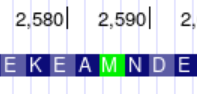
                                       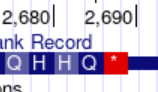

>Next I will analyze my E.Coli Data with with the data from UCSC. Here are the first 100 elements from my ORF's list. [(159, 282, '-'), (336, 2796, '+'), (372, 483, '+'), (483, 2796, '+'), (564, 864, '-'), (720, 2796, '+'), (735, 2796, '+'), (885, 2796, '+'), (894, 2796, '+'), (915, 1071, '+'), (1080, 2796, '+'), (1098, 2796, '+'), (1278, 2796, '+'), (1284, 2796, '+'), (1308, 2796, '+'), (1317, 2796, '+'), (1326, 2796, '+'), (1344, 2058, '-'), (1350, 2796, '+'), (1455, 2796, '+'), (1458, 2058, '-'), (1500, 2058, '-'), (1545, 1662, '+'), (1551, 2796, '+'), (1575, 2058, '-'), (1707, 2058, '-'), (1707, 2796, '+'), (1848, 2058, '-'), (1908, 2058, '-'), (2025, 2220, '+'), (2091, 2796, '+'), (2115, 2220, '+'), (2223, 2373, '-'), (2223, 2796, '+'), (2286, 2796, '+'), (2322, 2796, '+'), (2364, 2796, '+'), (2475, 2604, '+'), (2490, 2796, '+'), (2652, 2787, '+'), (2799, 3729, '+'), (2835, 3729, '+'), (2970, 3141, '-'), (3048, 3729, '+'), (3066, 3729, '+'), (3120, 3729, '+'), (3126, 3729, '+'), (3177, 3729, '+'), (3219, 3705, '-'), (3249, 3729, '+'), (3258, 3729, '+'), (3303, 3471, '+'), (3474, 3729, '+'), (3732, 5016, '+'), (3789, 3993, '-'), (3816, 3993, '-'), (3867, 5016, '+'), (3924, 4083, '+'), (3960, 4077, '-'), (4071, 5016, '+'), (4080, 5016, '+'), (4170, 4296, '-'), (4350, 4566, '-'), (4386, 4566, '-'), (4425, 4566, '-'), (4632, 5016, '+'), (4749, 5016, '+'), (4764, 4917, '-'), (4839, 4998, '+'), (5085, 5232, '+'), (5214, 5349, '+'), (5241, 5526, '+'), (5286, 5526, '+'), (5370, 5529, '+'), (5412, 5529, '+'), (5847, 6024, '+'), (6078, 6180, '-'), (6138, 6375, '+'), (6264, 6375, '+'), (6327, 6465, '-'), (6342, 7209, '-'), (6462, 7209, '-'), (6480, 6585, '+'), (6591, 6693, '+'), (6678, 6849, '+'), (6702, 6849, '+'), (6714, 6849, '+'), (6714, 7209, '-'), (6816, 7209, '-'), (6993, 7209, '-'), (7011, 7164, '+'), (7017, 7209, '-'), (7029, 7164, '+'), (7050, 7164, '+'), (7083, 7209, '-'), (7086, 7191, '+'), (7089, 7209, '-'), (7257, 7365, '+'), (7356, 7467, '-'), (7365, 7770, '+'), (7503, 7611, '+')]
Looking at the ORF's from the website, you can tell that they specify exactly which ORF you are looking at depending at the color of it. When looking at one of their ORF's I can see that they line up with what I have. For example take this element from my list, (1455,2796,'+')

.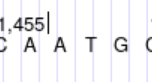
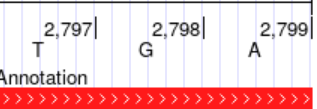

>It lines up with what the website says and this time the website explains which ORF we are looking at exactly. Which in this case its a +1 frame. For my last anlaysis I was unable to find the ORF's of the Haemophilus influenzae. Within the previous data sets my findings aligned with the UCSC data. Therefore, I'm certain that the third set would also align with the UCSC data.



### Submission

Submit your assignment as a Jupyter notebook via Canvas.  

### Grading 

Here is what the grade sheet will look like for this assignment. 

```
Grading sheet for assignment 1
- Correctness of find_orfs (70 pts)
- Results analysis and comparison to existing genome annotations
  (30 pts)

```
